# Permutation Feature Importance

In this notebook, we will evaluate feature importance by permutation, using Scikit-learn, Eli5 and Feature-engine.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
             'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'MoSold', 'YrSold', 'SalePrice']

In [3]:
# load dataset

data = pd.read_csv('../../houseprice.csv', usecols=variables)

data.shape

(1460, 34)

In [4]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

## Permutation with RFE

In [5]:
# Train Random Forests

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    random_state=2909,
)

In [6]:
# set up the permutation class

# we already fit the estimator
perm = PermutationImportance(
    rf,
    scoring="r2",
    n_iter=3,  # number of times each feature is shuffled
    cv=3,
    random_state=5,
)

In [7]:
sel = RFE(
    perm,
    n_features_to_select=10,
).set_output(transform="pandas")

In [8]:
# This may take a while ...

sel.fit(X_train, y_train)

RFE(estimator=PermutationImportance(cv=3,
                                    estimator=RandomForestRegressor(max_depth=3,
                                                                    random_state=2909),
                                    n_iter=3, random_state=5, scoring='r2'),
    n_features_to_select=10)

In [9]:
# the selected features

sel.get_feature_names_out()

array(['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea'], dtype=object)

In [10]:
# The importance of the remaining features

sel.estimator_.feature_importances_

array([0.65212388, 0.00602444, 0.01303279, 0.01848436, 0.01820355,
       0.00536866, 0.12977911, 0.00410948, 0.01883877, 0.01019038])

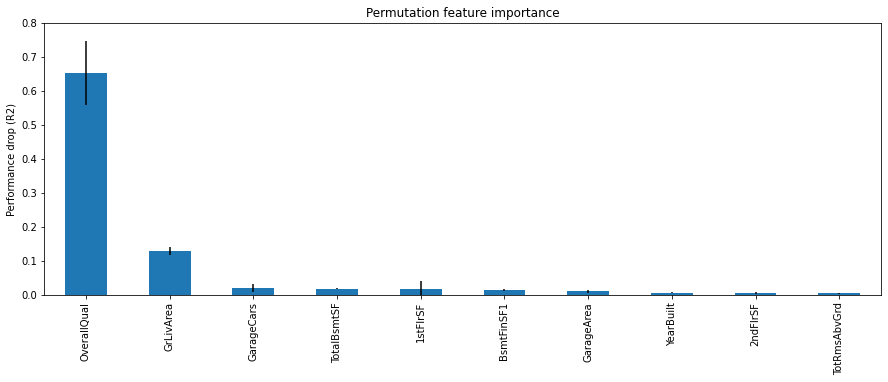

In [11]:
importance = pd.DataFrame({
    "importance": sel.estimator_.feature_importances_,
    "std": sel.estimator_.feature_importances_std_,
    },
    index = list(sel.get_feature_names_out())
)

# plot manually

importance["importance"].sort_values(
    ascending=False
).plot(figsize=(15, 5), kind="bar", yerr=importance["std"])

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.ylim(0, 0.8)
plt.show()

If we compare these values with those from the previous assignment, we see that other features show higher importance. 

These importance increased after removing their correlated counterparts from the training set.

We also see that TotalBsmtSF, 1stFlrSF and 2FlrSF are retained, even though previously, we removed them because they were correlated. This probably means that the value they add is more important than the importance split due to being correlated.